# Unit 5 - Financial Planning

In [13]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline


In [14]:
# Load .env enviroment variables
load_dotenv("var.env")

# alpaca_api_key = os.getenv("ALPACA_API_KEY")
# alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [15]:
# Set current amount of crypto assets
my_btc = 1.2
my_eth  = 5.3


In [16]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [28]:
# Retrieve BTC data
btc_response = requests.get(btc_url).json()
btc_response

{'data': {'1': {'id': 1,
   'name': 'Bitcoin',
   'symbol': 'BTC',
   'website_slug': 'bitcoin',
   'rank': 1,
   'circulating_supply': 19325093,
   'total_supply': 19325093,
   'max_supply': 21000000,
   'quotes': {'USD': {'price': 27305.0,
     'volume_24h': 35726239237,
     'market_cap': 526282898695,
     'percentage_change_1h': -1.41670329627252,
     'percentage_change_24h': -3.4288330026937,
     'percentage_change_7d': 10.2831041812011,
     'percent_change_1h': -1.41670329627252,
     'percent_change_24h': -3.4288330026937,
     'percent_change_7d': 10.2831041812011},
    'CAD': {'price': 37093.8425,
     'volume_24h': 48534096003.4645,
     'market_cap': 714955317877.157,
     'percent_change_1h': -1.41670329627252,
     'percent_change_24h': -3.4288330026937,
     'percent_change_7d': 10.2831041812011}},
   'last_updated': 1679516967}},
 'metadata': {'timestamp': 1679516967,
  'num_cryptocurrencies': 3119,
  'error': None}}

In [29]:
eth_response = requests.get(eth_url).json()
eth_response

{'data': {'1027': {'id': 1027,
   'name': 'Ethereum',
   'symbol': 'ETH',
   'website_slug': 'ethereum',
   'rank': 2,
   'circulating_supply': 120453489,
   'total_supply': 120453489,
   'max_supply': 120453489,
   'quotes': {'USD': {'price': 1736.11,
     'volume_24h': 13245840032,
     'market_cap': 208865773156,
     'percentage_change_1h': -1.50088825987548,
     'percentage_change_24h': -3.73501368594139,
     'percentage_change_7d': 1.62764376148507,
     'percent_change_1h': -1.50088825987548,
     'percent_change_24h': -3.73501368594139,
     'percent_change_7d': 1.62764376148507},
    'CAD': {'price': 2358.505435,
     'volume_24h': 17994473683.472,
     'market_cap': 283744152832.426,
     'percent_change_1h': -1.50088825987548,
     'percent_change_24h': -3.73501368594139,
     'percent_change_7d': 1.62764376148507}},
   'last_updated': 1679516942}},
 'metadata': {'timestamp': 1679516942,
  'num_cryptocurrencies': 3119,
  'error': None}}

In [30]:
# Fetch current BTC price
# YOUR CODE HERE!
# btc_response = requests.get(btc_url).json()
my_btc_value = btc_response['data']['1']['quotes']['CAD']['price']
print(my_btc_value)


37093.8425


In [31]:
# Fetch current ETH price
# YOUR CODE HERE!
# eth_response = requests.get(eth_url).json()
my_eth_value = eth_response['data']['1027']['quotes']['CAD']['price']
print(my_eth_value)


2358.505435


In [34]:
# Compute current value of my crpto
# YOUR CODE HERE!
my_btc_value = btc_response['data']['1']['quotes']['CAD']['price']
my_eth_value = eth_response['data']['1027']['quotes']['CAD']['price']
crypto_value = my_btc_value + my_eth_value
print(crypto_value)

39452.347935


In [36]:

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $37093.84
The current value of your 5.3 ETH is $2358.51


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [37]:
# Set current amount of shares
my_agg = 200
my_spy = 50

In [38]:
# Set Alpaca API key and secret
# YOUR CODE HERE!
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")
# Create the Alpaca API object
# YOUR CODE HERE!
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")

In [39]:
# Format current date as ISO format
# YOUR CODE HERE!
today = pd.Timestamp("2020-07-14", tz="America/New_York").isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to "1Day" for Alpaca API
timeframe = "1Day"

# Get current closing prices for SPY and AGG
# YOUR CODE HERE!
df_portfolio = alpaca.get_bars(tickers, timeframe, start = today, end = today).df
df_portfolio
# Reorganize the DataFrame
# Separate ticker data
# YOUR CODE HERE!
AGG = df_portfolio[df_portfolio['symbol']=='AGG'].drop('symbol', axis=1)
SPY = df_portfolio[df_portfolio['symbol']=='SPY'].drop('symbol', axis=1)
# Concatenate the ticker DataFrames
# YOUR CODE HERE!
ticker_concat = pd.concat([AGG,SPY], axis=1, keys=['AGG','SPY'])
# Preview DataFrame
# YOUR CODE HERE!
ticker_concat.head()

AGG                                   \
                             open    high     low   close   volume   
timestamp                                                            
2020-07-14 04:00:00+00:00  118.58  118.74  118.58  118.67  3986756   

                                                     SPY                 \
                          trade_count        vwap   open    high    low   
timestamp                                                                 
2020-07-14 04:00:00+00:00       14580  118.667216  313.3  319.76  312.0   

                                                                     
                            close    volume trade_count        vwap  
timestamp                                                            
2020-07-14 04:00:00+00:00  318.93  93545651      580270  316.244144

In [40]:
# Pick AGG and SPY close prices
# YOUR CODE HERE!

agg_close_price = float(ticker_concat["AGG"]["close"])
spy_close_price = float(ticker_concat["SPY"]["close"])
# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $118.67
Current SPY closing price: $318.93


In [41]:
# Compute the current value of shares
# YOUR CODE HERE!
my_agg_value = agg_close_price * my_agg
my_spy_value = spy_close_price * my_spy

# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $15946.50
The current value of your 200 AGG shares is $23734.00


### Savings Health Analysis

In [48]:
# Set monthly household income
# YOUR CODE HERE!
monthly_income = 12000
# Consolidate financial assets data
# YOUR CODE HERE!
crypto_value = my_btc_value + my_eth_value
share_value = my_agg_value + my_spy_value

# Create savings DataFrame
# YOUR CODE HERE!
df_savings = pd.DataFrame({'': ["cryto", "shares"], "amount": [crypto_value,share_value]}).set_index('')

# Display savings DataFrame
display(df_savings)

,amount
,
cryto,39452.347935
shares,39680.500000


<AxesSubplot:title={'center':'Portfolio'}, ylabel='amount'>

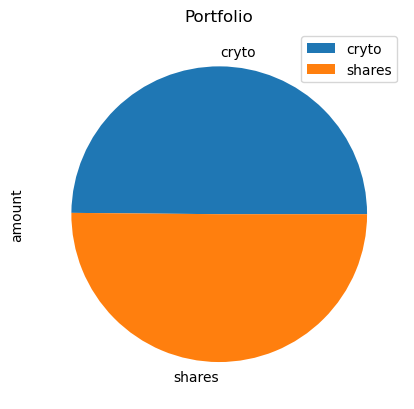

In [49]:
# Plot savings pie chart
# YOUR CODE HERE!
df_savings.plot.pie(y = "amount", title = "Portfolio")


In [50]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
# YOUR CODE HERE!
total_savings = crypto_value + share_value
total_savings = round(total_savings, 2)
# Validate saving health
# YOUR CODE HERE!
if total_savings > emergency_fund:
    print(f"Congratulations! You have saved ${total_savings}, exceeding your emergency fund of ${emergency_fund}")
elif total_savings < emergency_fund:
    print(f"You are short of ${total_savings-emergency_fund} to reach your emergency fund of ${emergency_fund}")
else:
    print(f"Congratulations! You have saved ${total_savings}, reaching your emergency fund of ${emergency_fund}")


Congratulations! You have saved $79132.85, exceeding your emergency fund of $36000


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [51]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2016-05-01', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2021-05-01', tz='America/New_York').isoformat()

In [53]:
# Get 5 years' worth of historical data for SPY and AGG
# YOUR CODE HERE!
df_stock_data = alpaca.get_bars(
    tickers,
    timeframe, 
    start = start_date, 
    end = end_date
).df

# Display sample data
df_stock_data.head()

,open,high,low,close,volume,trade_count,vwap,symbol
timestamp,,,,,,,,
2016-05-02 04:00:00+00:00,110.74,110.7400,110.5200,110.605,3553939,15119,110.627199,AGG
2016-05-03 04:00:00+00:00,110.89,110.9450,110.7500,110.810,3044940,15662,110.865995,AGG
2016-05-04 04:00:00+00:00,110.91,110.9315,110.7595,110.860,2920608,13982,110.879063,AGG
2016-05-05 04:00:00+00:00,110.92,111.1600,110.8010,111.140,3008142,15707,111.028363,AGG
2016-05-06 04:00:00+00:00,111.12,111.1200,110.9700,110.970,2718710,12697,111.031967,AGG


In [54]:
df_stock_data.tail()

,open,high,low,close,volume,trade_count,vwap,symbol
timestamp,,,,,,,,
2021-04-26 04:00:00+00:00,417.44,418.22,416.8111,417.61,51824860,295870,417.508245,SPY
2021-04-27 04:00:00+00:00,417.93,418.14,416.3000,417.52,50297139,296300,417.481360,SPY
2021-04-28 04:00:00+00:00,417.81,419.01,416.9000,417.40,50692781,330049,417.742098,SPY
2021-04-29 04:00:00+00:00,420.32,420.72,416.4400,420.06,76965583,443396,418.824046,SPY
2021-04-30 04:00:00+00:00,417.63,418.54,416.3400,417.30,84731942,478844,417.651995,SPY


In [55]:
# Reorganize the DataFrame
# Separate ticker data
# YOUR CODE HERE!

AGG = df_stock_data[df_stock_data['symbol'] == 'AGG'].drop('symbol', axis=1)
SPY = df_stock_data[df_stock_data['symbol'] == 'SPY'].drop('symbol', axis=1)

# Concatenate the ticker DataFrames
# YOUR CODE HERE!
df_stock_data = pd.concat([AGG,SPY],axis=1, keys=['AGG','SPY'])

df_stock_data

AGG                                        \
                             open      high       low    close   volume   
timestamp                                                                 
2016-05-02 04:00:00+00:00  110.74  110.7400  110.5200  110.605  3553939   
2016-05-03 04:00:00+00:00  110.89  110.9450  110.7500  110.810  3044940   
2016-05-04 04:00:00+00:00  110.91  110.9315  110.7595  110.860  2920608   
2016-05-05 04:00:00+00:00  110.92  111.1600  110.8010  111.140  3008142   
2016-05-06 04:00:00+00:00  111.12  111.1200  110.9700  110.970  2718710   
...                           ...       ...       ...      ...      ...   
2021-04-26 04:00:00+00:00  114.74  114.8015  114.6500  114.650  3480303   
2021-04-27 04:00:00+00:00  115.13  115.1300  114.3700  114.370  3820640   
2021-04-28 04:00:00+00:00  114.45  114.4685  114.2000  114.430  7075831   
2021-04-29 04:00:00+00:00  114.14  114.3700  114.0900  114.370  6208142   
2021-04-30 04:00:00+00:00  114.41  114.5150  114.3300  114.490  6469432   

                                                      SPY                    \
                          trade_count        vwap    open    high       low   
timestamp                                                                     
2016-05-02 04:00:00+00:00       15119  110.627199  206.92  208.18  206.4100   
2016-05-03 04:00:00+00:00       15662  110.865995  206.52  206.80  205.2800   
2016-05-04 04:00:00+00:00       13982  110.879063  204.99  205.85  204.4200   
2016-05-05 04:00:00+00:00       15707  111.028363  205.56  205.98  204.4700   
2016-05-06 04:00:00+00:00       12697  111.031967  204.08  205.77  203.8800   
...                               ...         ...     ...     ...       ...   
2021-04-26 04:00:00+00:00       13520  114.706244  417.44  418.22  416.8111   
2021-04-27 04:00:00+00:00       12720  114.498315  417.93  418.14  416.3000   
2021-04-28 04:00:00+00:00       24303  114.379810  417.81  419.01  416.9000   
2021-04-29 04:00:00+00:00       21096  114.250702  420.32  420.72  416.4400   
2021-04-30 04:00:00+00:00       19582  114.456246  417.63  418.54  416.3400   

                                                                        
                              close     volume trade_count        vwap  
timestamp                                                               
2016-05-02 04:00:00+00:00  207.9700   61908515      263580  207.294812  
2016-05-03 04:00:00+00:00  206.1592  106422142      377518  206.312060  
2016-05-04 04:00:00+00:00  205.0100   92199810      345261  205.090172  
2016-05-05 04:00:00+00:00  204.9700   67597222      280622  205.141555  
2016-05-06 04:00:00+00:00  205.7200   89131004      340335  204.937074  
...                             ...        ...         ...         ...  
2021-04-26 04:00:00+00:00  417.6100   51824860      295870  417.508245  
2021-04-27 04:00:00+00:00  417.5200   50297139      296300  417.481360  
2021-04-28 04:00:00+00:00  417.4000   50692781      330049  417.742098  
2021-04-29 04:00:00+00:00  420.0600   76965583      443396  418.824046  
2021-04-30 04:00:00+00:00  417.3000   84731942      478844  417.651995  

[1259 rows x 14 columns]

In [77]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
# YOUR CODE HERE!
# ?MCSimulation
MC_thirtyyear = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.40,0.60],
    num_simulation = 500,
    num_trading_days = 252*30
)

In [78]:
# Printing the simulation input data
# YOUR CODE HERE
MC_thirtyyear.portfolio_data.head()

AGG                                        \
                             open      high       low    close   volume   
timestamp                                                                 
2016-05-02 04:00:00+00:00  110.74  110.7400  110.5200  110.605  3553939   
2016-05-03 04:00:00+00:00  110.89  110.9450  110.7500  110.810  3044940   
2016-05-04 04:00:00+00:00  110.91  110.9315  110.7595  110.860  2920608   
2016-05-05 04:00:00+00:00  110.92  111.1600  110.8010  111.140  3008142   
2016-05-06 04:00:00+00:00  111.12  111.1200  110.9700  110.970  2718710   

                                                                   SPY  \
                          trade_count        vwap daily_return    open   
timestamp                                                                
2016-05-02 04:00:00+00:00       15119  110.627199          NaN  206.92   
2016-05-03 04:00:00+00:00       15662  110.865995     0.001853  206.52   
2016-05-04 04:00:00+00:00       13982  110.879063     0.000451  204.99   
2016-05-05 04:00:00+00:00       15707  111.028363     0.002526  205.56   
2016-05-06 04:00:00+00:00       12697  111.031967    -0.001530  204.08   

                                                                            \
                             high     low     close     volume trade_count   
timestamp                                                                    
2016-05-02 04:00:00+00:00  208.18  206.41  207.9700   61908515      263580   
2016-05-03 04:00:00+00:00  206.80  205.28  206.1592  106422142      377518   
2016-05-04 04:00:00+00:00  205.85  204.42  205.0100   92199810      345261   
2016-05-05 04:00:00+00:00  205.98  204.47  204.9700   67597222      280622   
2016-05-06 04:00:00+00:00  205.77  203.88  205.7200   89131004      340335   

                                                    
                                 vwap daily_return  
timestamp                                           
2016-05-02 04:00:00+00:00  207.294812          NaN  
2016-05-03 04:00:00+00:00  206.312060    -0.008707  
2016-05-04 04:00:00+00:00  205.090172    -0.005574  
2016-05-05 04:00:00+00:00  205.141555    -0.000195  
2016-05-06 04:00:00+00:00  204.937074     0.003659

In [79]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
# YOUR CODE HERE!
import warnings
warnings.filterwarnings('ignore')

MC_thirtyyear.calc_cumulative_return()


Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.996863,1.001419,1.004420,1.003377,0.999533,1.011843,1.010446,1.005818,0.998554,1.007146,...,1.005433,1.016201,0.997487,1.002454,1.005206,0.999583,0.999870,1.001978,0.999934,1.004666
2,0.994871,0.996216,1.010989,1.008669,1.008074,0.996593,1.020662,0.997789,1.004290,1.015375,...,0.994262,1.002242,1.010153,0.995788,1.003168,1.000348,1.005509,0.997464,0.992820,1.001380
3,0.990530,1.004196,1.018516,1.016080,1.001082,0.993501,1.021511,0.987289,1.006116,1.026640,...,0.998800,0.991890,1.009722,0.990993,0.997666,0.980792,1.001749,0.981652,0.994581,0.997781
4,0.976064,1.004110,1.015876,1.016511,0.986927,0.990059,1.013833,0.973420,1.000953,1.027385,...,0.999670,0.979215,1.014463,1.006283,1.001198,0.970993,1.003594,0.996137,1.006415,0.988646
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,35.973223,3.449026,15.593979,32.099692,11.901903,35.378581,21.393641,37.535781,10.667911,17.878827,...,14.490526,20.910828,12.846261,26.802106,13.327172,9.687605,12.053314,10.417918,22.217171,15.495620
7557,35.860736,3.448745,15.585266,32.065001,11.923647,35.559639,21.370110,37.417797,10.739143,17.976056,...,14.563907,20.830912,12.830379,26.946086,13.355860,9.732875,11.964236,10.348400,22.292973,15.506756
7558,35.824772,3.456710,15.513503,32.028465,11.844379,36.326498,21.432150,37.117890,10.730184,18.203781,...,14.603124,20.751715,12.697106,27.147941,13.194689,9.737502,11.962259,10.428868,22.440234,15.418955
7559,36.114893,3.433363,15.682005,31.798100,11.850297,36.168717,21.622443,37.009922,10.815521,18.250453,...,14.674333,20.797068,12.795216,27.101669,13.187916,9.684714,11.938346,10.476613,22.434467,15.485074


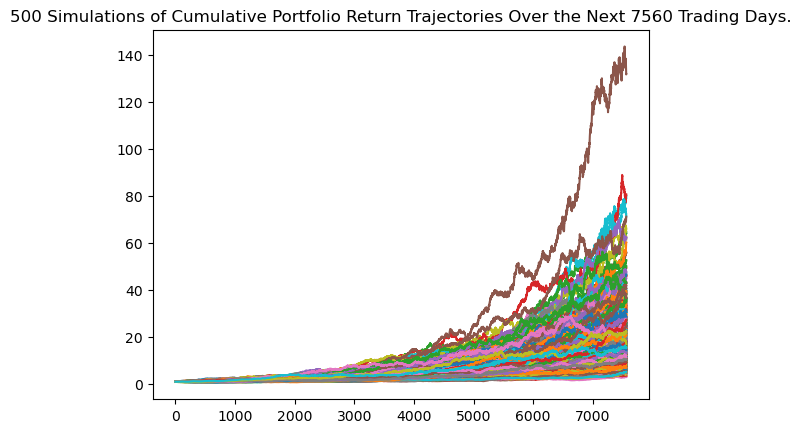

In [80]:
# Plot simulation outcomes
# YOUR CODE HERE!
line_plot = MC_thirtyyear.plot_simulation()

# Save the plot for future usage
line_plot.get_figure().savefig("MC_thirtyyear_sim_plot.png", bbox_inches="tight")

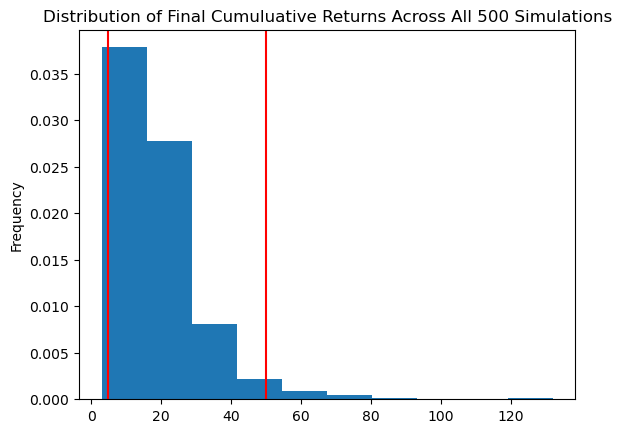

In [81]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!
dist_plot = MC_thirtyyear.plot_distribution()


### Retirement Analysis

In [82]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!
tbl = MC_thirtyyear.summarize_cumulative_return()

# Print summary statistics
# YOUR CODE HERE!
print(tbl)

count           500.000000
mean             19.250129
std              13.067045
min               2.973311
25%              10.391958
50%              16.064884
75%              24.212590
max             131.942236
95% CI Lower      4.910150
95% CI Upper     49.885427
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [83]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
# YOUR CODE HERE!
ci_lower = round(tbl[8]*initial_investment,2)
ci_upper = round(tbl[9]*initial_investment,2)
# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $98203.0 and $997708.53


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [84]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
# YOUR CODE HERE!
ci_lower = round(tbl[8]*30000,2)
ci_upper = round(tbl[9]*30000,2)
# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $147304.49 and $1496562.8


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [ ]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Plot simulation outcomes
# YOUR CODE HERE!

In [ ]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!

In [ ]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!

# Print summary statistics
# YOUR CODE HERE!

In [ ]:
# Set initial investment
# YOUR CODE HERE!

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

### Ten Years Retirement Option

In [ ]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Plot simulation outcomes
# YOUR CODE HERE!

In [ ]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!

In [ ]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!

# Print summary statistics
# YOUR CODE HERE!

In [ ]:
# Set initial investment
# YOUR CODE HERE!

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")